### Gather - Coleta

In [1]:
import pandas as pd
import requests
import seaborn as sea
from matplotlib import pyplot as plt
import tweepy
import datetime as dt
import io
import json
import re
%matplotlib inline


In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
tsv = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with requests.Session() as s:
    download = s.get(tsv).content
    
image_predictions=pd.read_csv(io.StringIO(download.decode('utf-8')), sep='\t')

In [104]:
consumer_key = 'xxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [5]:
Exception = []
with open('tweet_json.txt', 'w',encoding='utf-8') as outfile: 
    for id in twitter_archive.tweet_id:
        try:
            tweet = api.get_status(id)
            json.dump(tweet,outfile)
            outfile.write('\n')
        except tweepy.TweepError: 
            print("Erro na aquisição do Tweet id: " + str(id))
            Exception.append(id)

Erro na aquisição do Tweet id: 888202515573088257
Erro na aquisição do Tweet id: 873697596434513921
Erro na aquisição do Tweet id: 872668790621863937
Erro na aquisição do Tweet id: 872261713294495745
Erro na aquisição do Tweet id: 869988702071779329
Erro na aquisição do Tweet id: 866816280283807744
Erro na aquisição do Tweet id: 861769973181624320
Erro na aquisição do Tweet id: 845459076796616705
Erro na aquisição do Tweet id: 842892208864923648
Erro na aquisição do Tweet id: 837012587749474308
Erro na aquisição do Tweet id: 827228250799742977
Erro na aquisição do Tweet id: 812747805718642688
Erro na aquisição do Tweet id: 802247111496568832
Erro na aquisição do Tweet id: 775096608509886464


Rate limit reached. Sleeping for: 526


Erro na aquisição do Tweet id: 770743923962707968
Erro na aquisição do Tweet id: 754011816964026368


Rate limit reached. Sleeping for: 610


Erro na aquisição do Tweet id: 680055455951884288


In [6]:
print("Quantidade de tweet_id não encontrados: {}".format(len(Exception)))

Quantidade de tweet_id não encontrados: 17


In [7]:
tweet_json= []
with open('tweet_json.txt', 'r') as readfile:
    for line in readfile:
        tweets = json.loads(line)
        
        tweet_json.append({'tweet_id': tweets['id'],
                            'retweet_count': tweets['retweet_count'],
                            'favorite_count': tweets['favorite_count']
                           })
twitter_api = pd.DataFrame(tweet_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

### Assess - Avaliação

In [8]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8213,37665
1,892177421306343426,6072,32352
2,891815181378084864,4015,24369
3,891689557279858688,8369,40981
4,891327558926688256,9069,39181


In [9]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Lucy            11
Cooper          11
Penny           10
Lola            10
Tucker          10
Bo               9
Winston          9
the              8
Sadie            8
an               7
Daisy            7
Buddy            7
Toby             7
Bailey           7
Jax              6
Dave             6
Leo              6
Milo             6
Scout            6
Jack             6
Stanley          6
Oscar            6
Bella            6
Koda             6
Rusty            6
Phil             5
              ... 
incredibly       1
Reagan           1
Vince            1
Jonah            1
Leonard          1
Sora             1
Lacy             1
Samsom           1
Callie           1
Sparky           1
Sundance         1
Rumble           1
Beckham          1
Alexander        1
Torque           1
Brooks           1
Dido             1
Oddie            1
Shakespeare      1
Carbon           1
Tug              1
Harlso      

In [15]:
pd.set_option('display.max_colwidth', -1)
twitter_archive.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [16]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive.expanded_urls.isnull().value_counts()

False    2297
True     59  
Name: expanded_urls, dtype: int64

In [19]:
image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                       

In [20]:
image_predictions[(image_predictions['p1_dog'] == False) & (image_predictions['p2_dog'] == False) & (image_predictions['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


### Qualidade
    - Texto com URL
    - Source contém informações da linha do html.
    - Outliers no Numerador/ Denominador.
    - Coluna 'Timestamp' é uma string.
    - Raça dos cachorros varia entre maiúsculas e minúsculas.
    - Muitos valores nulos nos em alguns campos do dataset.
    - Algumas imagens não são cachorros.
    - Algumas linhas contém URL de imagens  duplicadas.
    - Algumas URL estão com valores nulos. 
    - Colunas como "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "img_num" são irrelevantes pois contém muitos valores nulos e de pouca utilização.
    - Entendendo A e An como artigos e não nomes mudar para None. 
    - Tweet_id é um inteiro

### Arrumação
    - Colunas "doggo", "pupper", "floofler" e "puppo" deveriam ser uma coluna chamada "Dog_stage" 
    - Os 3 Dataframes estão separados.
    - Deveria existir uma coluna 'confidence_prediction' para somar as predições e eliminar as outras colunas p1_conf,p2_conf,p3_conf
    - O nome da colunas p1,p2,p3 não é de fácil entendimento
    - Colunas como "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "img_num" são irrelevantes pois contém muitos valores nulos e de pouca utilização.
    


### Clean - Limpeza

In [64]:
tarc_clean = twitter_archive.copy()
ip_clean = image_predictions.copy()
tapi_clean = twitter_api.copy()

##### 3 dataframes separados
Definição: Fazer inner join nos 3 dataframes

In [65]:
dataframe = pd.merge(twitter_archive, image_predictions, how = 'inner', on = ['tweet_id'] )
dataframe = pd.merge(dataframe, twitter_api, how = 'inner', on = ['tweet_id'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 30 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                       2066 

#### Texto com URL
Definição: Aplicar uma expressão regular para extrair o link do texto.

In [66]:
dataframe['text']= dataframe.text.apply(lambda x: re.sub(r"http\S+", "", str(x)))

In [67]:
dataframe.text.sample(5)

1277    This is Lolo. She's America af. Behind in science &amp; math but can say whatever she wants on Twitter. 11/10 ...Merica 
1336    This is Olivia. She just saw an adult wearing crocs. 11/10 poor pupper. No one should witness such a thing              
1452    Meet Goliath. He's an example of irony. Head is phenomenally round. Wants to be an ornament. 12/10 would hug gently     
1566    🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s                                                                             
1584    This is Daisy. She loves that shoe. Still no seat belt. Super churlish. 12/10 the dogs are killing it today             
Name: text, dtype: object

#### Source contém informações da linha do html
Definição: Aplicar uma expressão regular na Tag do HTML

In [68]:
dataframe['source'] = dataframe.source.apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [69]:
dataframe.source.sample(5)

1089    Twitter for iPhone
1433    Twitter for iPhone
660     Twitter for iPhone
329     Twitter for iPhone
1945    Twitter for iPhone
Name: source, dtype: object

#### Coluna 'Timestamp' é uma string
Definição: Aplicar o método Datetime do Pandas na coluna

In [70]:
dataframe['timestamp'] = pd.to_datetime(dataframe.timestamp)

In [71]:
dataframe.timestamp.sample().astype

<bound method NDFrame.astype of 1132   2016-02-27 00:55:11
Name: timestamp, dtype: datetime64[ns]>

#### Tipo dos cachorros varia entre maiúsculas e minúsculas
Definição: Colocar todos os p1 com caracteres minúsculos

In [72]:
dataframe['p1']=dataframe.p1.str.lower()
dataframe.p1.sample(3)

359     golden_retriever
1915    vacuum          
853     kuvasz          
Name: p1, dtype: object

#### Confidence Prediction
Definição: Somar p1_conf, p2_conf e p3_conf e criar uma nova coluna para agrupar toda Confiança em um único indicador

In [73]:
confidence_prediction = dataframe.p1_conf + dataframe.p2_conf + dataframe.p3_conf 
dataframe['confidence_prediction'] = confidence_prediction
confidence_prediction.sample()

286    0.827129
dtype: float64

#### Renomear a Coluna P1
Definição: Para melhor compreensão do campo renomear o campo p1 para 'Dog_Breed' para sinalizar que este é a raça do cachorro.  

In [74]:
dataframe.rename(columns={'p1':'dog_breed'},inplace=True)

In [75]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 31 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null datetime64[ns]
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                    

#### Imagens que não contém cachorros
Definição: Remover as linhas aonde p1_dog,p2_dog e p3_dog foram iguais a falso, considerando que não são cachorros. 

In [76]:
dataframe = dataframe.drop(dataframe.index[(dataframe['p1_dog'] == False) & (dataframe['p2_dog'] == False) & (dataframe['p3_dog'] == False)])

In [77]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 1 to 2065
Data columns (total 31 columns):
tweet_id                      1743 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1743 non-null datetime64[ns]
source                        1743 non-null object
text                          1743 non-null object
retweeted_status_id           60 non-null float64
retweeted_status_user_id      60 non-null float64
retweeted_status_timestamp    60 non-null object
expanded_urls                 1743 non-null object
rating_numerator              1743 non-null int64
rating_denominator            1743 non-null int64
name                          1743 non-null object
doggo                         1743 non-null object
floofer                       1743 non-null object
pupper                        1743 non-null object
puppo                         1743 non-null object
jpg_url                    

#### URL de imagens duplicadas
Definição: Retirar as url de imagens duplicadas visto que para análise seria uma duplicata de uma predição. 

In [78]:
dataframe = dataframe.drop_duplicates('jpg_url')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 1 to 2065
Data columns (total 31 columns):
tweet_id                      1688 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1688 non-null datetime64[ns]
source                        1688 non-null object
text                          1688 non-null object
retweeted_status_id           60 non-null float64
retweeted_status_user_id      60 non-null float64
retweeted_status_timestamp    60 non-null object
expanded_urls                 1688 non-null object
rating_numerator              1688 non-null int64
rating_denominator            1688 non-null int64
name                          1688 non-null object
doggo                         1688 non-null object
floofer                       1688 non-null object
pupper                        1688 non-null object
puppo                         1688 non-null object
jpg_url                    

#### Colunas não necessárias
Definição: Remover colunas que não serão necessárias para análise ou que pouco acrescentam 

In [80]:
drop_columns=['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id',
              'retweeted_status_timestamp','img_num','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_dog','p3_conf'] 
dataframe = dataframe.drop(drop_columns, axis=1)
dataframe.columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 1 to 2065
Data columns (total 17 columns):
tweet_id                 1688 non-null int64
timestamp                1688 non-null datetime64[ns]
source                   1688 non-null object
text                     1688 non-null object
expanded_urls            1688 non-null object
rating_numerator         1688 non-null int64
rating_denominator       1688 non-null int64
name                     1688 non-null object
doggo                    1688 non-null object
floofer                  1688 non-null object
pupper                   1688 non-null object
puppo                    1688 non-null object
jpg_url                  1688 non-null object
dog_breed                1688 non-null object
retweet_count            1688 non-null int64
favorite_count           1688 non-null int64
confidence_prediction    1688 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(10)
memory usage: 237.4+ KB


#### Transfomar Doggo, Floofler, Pupper e Puppo em uma única coluna
Definição: Unir as Colunas supracitadas em um única coluna chamada 'dog_stage'

In [81]:
dataframe = pd.melt(dataframe, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator', 
                                        'rating_denominator', 'name', 'jpg_url', 'dog_breed', 'retweet_count',
                                        'favorite_count', 'confidence_prediction'],var_name='stage', value_name='dog_stage',
                                        value_vars=['doggo', 'floofer','pupper', 'puppo'])
dataframe = dataframe.drop('stage',axis=1)
dataframe = dataframe.drop_duplicates()
dataframe=dataframe.drop(dataframe[(True==dataframe.duplicated('tweet_id')) & (dataframe.dog_stage=='None')].index)

In [82]:
print('\n',dataframe.info())
print('\n',dataframe.dog_stage.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 0 to 5805
Data columns (total 14 columns):
tweet_id                 1895 non-null int64
timestamp                1895 non-null datetime64[ns]
source                   1895 non-null object
text                     1895 non-null object
expanded_urls            1895 non-null object
rating_numerator         1895 non-null int64
rating_denominator       1895 non-null int64
name                     1895 non-null object
jpg_url                  1895 non-null object
dog_breed                1895 non-null object
retweet_count            1895 non-null int64
favorite_count           1895 non-null int64
confidence_prediction    1895 non-null float64
dog_stage                1895 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 222.1+ KB

 None

 None       1624
pupper     177 
doggo      64  
puppo      22  
floofer    8   
Name: dog_stage, dtype: int64


#### Outliers do Rating e Denominator
#### Definição
Considerando o valor mais encontrado como o valor padrão, optei por considerar como outlier tanto para mais, tanto para  menos, todo valor que for maior que o padrão mais a sua metade e menor que padrão menos a sua metade. 
Sendo Y o outlier e X o valor padrão, Outlier = x - x/2 < y > x + x/2

In [83]:
dataframe = dataframe.drop(dataframe[(dataframe.rating_numerator>18)|(dataframe.rating_numerator<6)].index)
dataframe = dataframe.drop(dataframe[(dataframe.rating_numerator>15)|(dataframe.rating_numerator<5)].index)

In [84]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 5805
Data columns (total 14 columns):
tweet_id                 1847 non-null int64
timestamp                1847 non-null datetime64[ns]
source                   1847 non-null object
text                     1847 non-null object
expanded_urls            1847 non-null object
rating_numerator         1847 non-null int64
rating_denominator       1847 non-null int64
name                     1847 non-null object
jpg_url                  1847 non-null object
dog_breed                1847 non-null object
retweet_count            1847 non-null int64
favorite_count           1847 non-null int64
confidence_prediction    1847 non-null float64
dog_stage                1847 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 216.4+ KB


##### A,  An e the  como Nomes
Definição: Trocar 'a','an' e 'the' por 'None'

In [85]:
dataframe.at[dataframe[(dataframe.name=='a')|(dataframe.name =='an') | (dataframe.name =='the')].index,'name'] = 'None'

In [86]:
dataframe.name.value_counts()

None           537
Cooper         13 
Lucy           11 
Oliver         11 
Charlie        10 
Tucker         9  
Penny          8  
Jax            7  
Daisy          7  
Winston        7  
Sadie          7  
Gus            6  
Milo           6  
Toby           6  
Koda           6  
Lola           6  
Bo             6  
just           5  
Larry          5  
Scooter        5  
Stanley        5  
Finn           5  
Rusty          5  
Winnie         5  
Oscar          5  
Maggie         5  
Bella          5  
Leo            5  
Clark          4  
one            4  
              ..  
Stephanus      1  
Jangle         1  
Kody           1  
Puff           1  
Biden          1  
Rey            1  
Jeb            1  
Glacier        1  
Newt           1  
Vince          1  
Jonah          1  
Rumble         1  
Laela          1  
Enchilada      1  
Brooks         1  
Obi            1  
Bloo           1  
Sundance       1  
Tuco           1  
Alexander      1  
Torque         1  
Harlso      

#### Tweet ID é um inteiro
Definição: Transformar o campo tweet_id em um campo categórico.

In [87]:
dataframe['tweet_id'] = dataframe['tweet_id'].astype(object)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 5805
Data columns (total 14 columns):
tweet_id                 1847 non-null object
timestamp                1847 non-null datetime64[ns]
source                   1847 non-null object
text                     1847 non-null object
expanded_urls            1847 non-null object
rating_numerator         1847 non-null int64
rating_denominator       1847 non-null int64
name                     1847 non-null object
jpg_url                  1847 non-null object
dog_breed                1847 non-null object
retweet_count            1847 non-null int64
favorite_count           1847 non-null int64
confidence_prediction    1847 non-null float64
dog_stage                1847 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 296.4+ KB


### Armazenamento - Storing

In [88]:
dataframe.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

### Análise Exploratória

In [2]:
dataframe = pd.read_csv('twitter_archive_master.csv')

In [89]:
dataframe.groupby(dataframe['timestamp'].dt.weekday_name).agg(['median','count'])

rating_numerator       rating_denominator       retweet_count        \
                    median count             median count        median count   
timestamp                                                                       
Friday     11               257   10                 257   1348.0        257    
Monday     11               309   10                 309   1257.0        309    
Saturday   11               239   10                 239   1301.0        239    
Sunday     11               232   10                 232   1200.5        232    
Thursday   11               278   10                 278   1326.0        278    
Tuesday    11               266   10                 266   1374.0        266    
Wednesday  11               266   10                 266   1493.5        266    

          favorite_count       confidence_prediction        
                  median count                median count  
timestamp                                                   
Friday     3799.0         257   0.879333              257   
Monday     3525.0         309   0.831234              309   
Saturday   3789.0         239   0.882580              239   
Sunday     3316.0         232   0.891689              232   
Thursday   3831.0         278   0.879820              278   
Tuesday    3944.0         266   0.846899              266   
Wednesday  3974.5         266   0.894177              266

#### Insight 1
Os dias nos quais mais se produz são os dias regulares da semana, logo, os dias que menos se produz são os de fim de semana. Segunda feira, apesar de ser o dia de maior produção de conteúdo, a mediana dos favoritos é bem próxima do sábado e domingo que técnicamente são os dias de menor produção de conteúdo. Sexta lidera na mediana de favoritos e Terça a de Retweets. 

In [90]:
dataframe.groupby(dataframe['timestamp'].dt.year).agg(['median','count'])

rating_numerator       rating_denominator       retweet_count        \
                    median count             median count        median count   
timestamp                                                                       
2015       10               533   10                 533   423.0         533    
2016       11               952   10                 952   1452.5        952    
2017       13               362   10                 362   3986.0        362    

          favorite_count       confidence_prediction        
                  median count                median count  
timestamp                                                   
2015       1192.0         533   0.838554              533   
2016       4265.0         952   0.872825              952   
2017       19072.5        362   0.919647              362

In [91]:
time2 = dataframe[['tweet_id','timestamp', 'retweet_count', 'favorite_count']].copy()
time2.set_index('tweet_id', inplace=True)
time2['year'] = time2['timestamp'].dt.year
time2['month'] = time2['timestamp'].dt.month
time2 = time2.drop('timestamp',axis=1)
visual =time2.groupby(['year','month']).agg(['count','sum','median'])
visual

retweet_count                 favorite_count                  
                   count     sum  median          count      sum   median
year month                                                               
2015 11     213           90022   195.0   213            225824   501.0  
     12     320           409013  596.5   320            1004294  1717.0 
2016 1      167           202327  849.0   167            566905   2714.0 
     2      111           136019  956.0   111            399666   2760.0 
     3      112           154267  981.5   112            456804   3217.0 
     4      51            77495   1351.0  51             233437   4296.0 
     5      56            89467   1225.0  56             266990   4126.0 
     6      74            297376  1681.0  74             750287   5511.5 
     7      91            257504  1716.0  91             574620   5443.0 
     8      48            128572  2036.0  48             366691   6451.0 
     9      62            264926  2853.0  62             543668   8131.0 
     10     57            210755  3020.0  57             579359   9483.0 
     11     60            242142  3003.5  60             547318   9597.0 
     12     63            338191  2996.0  63             905699   9823.0 
2017 1      72            470775  2868.0  72             1139288  10873.5
     2      62            254297  3063.0  62             988897   13728.5
     3      48            239673  4288.0  48             959259   19620.0
     4      39            222513  4784.0  39             853037   20080.0
     5      40            302657  4169.0  40             1207578  19824.0
     6      48            279247  4004.0  48             1254392  22209.5
     7      52            345861  5007.5  52             1564419  27168.0
     8      1             6072    6072.0  1              32352    32352.0

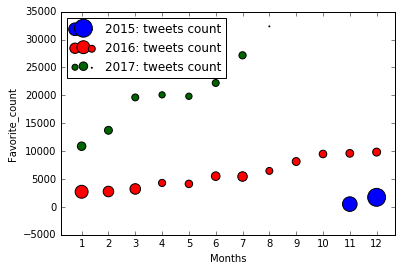

In [120]:
ax = visual['favorite_count'].loc[2015].reset_index().plot.scatter(x ='month',y='median',c='blue',s=visual['favorite_count','count'] , xticks=range(1,13), label='2015: tweets count')
ax1 = visual['favorite_count'].loc[2016].reset_index().plot.scatter(x ='month',y='median',c='red',s=visual['favorite_count','count'].loc[2016] , xticks=range(1,13),label='2016: tweets count',ax=ax )
visual['favorite_count'].loc[2017].reset_index().plot.scatter(x ='month',y='median',c='darkgreen',s=visual['favorite_count','count'].loc[2017], xticks=range(1,13),label='2017: tweets count',ax=ax1 )
ax.set(xlabel='Months', ylabel='Favorite_count')
plt.savefig('Fav_YM',dpi=80)
plt.show()

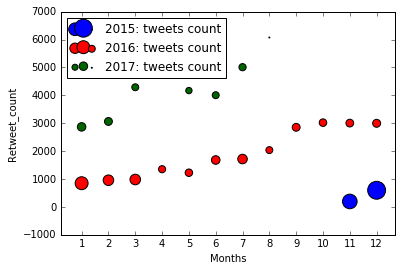

In [121]:
ax = visual['retweet_count'].loc[2015].reset_index().plot.scatter(x ='month',y='median',c='blue',s=visual['retweet_count','count'] , xticks=range(1,13), label='2015: tweets count')
ax1 = visual['retweet_count'].loc[2016].reset_index().plot.scatter(x ='month',y='median',c='red',s=visual['retweet_count','count'].loc[2016] , xticks=range(1,13),label='2016: tweets count',ax=ax )
visual['retweet_count'].loc[2017].reset_index().plot.scatter(x ='month',y='median',c='darkgreen',s=visual['retweet_count','count'].loc[2017], xticks=range(1,13),label='2017: tweets count',ax=ax1 )
ax.set(xlabel='Months', ylabel='Retweet_count')
plt.savefig('Retweet_YM',dpi=80)
plt.show()

#### Insight 2 
Com o passar do tempo o número de tweets publicado foi diminuindo e o a popularidade do perfil foi aumentando. Em 2 meses de 2015, temos a metade do total de tweets publicado de 2016 inteiro, e quase o dobro 8 primeiros meses de 2017. **O Mês para virada de Chave é o mês de abril de 2016.** Tivemos uam redução drástica no número de tweets gerados. Neste mesmo mês, quando olhamos a soma dos favoritos e dos retweets vemos que de fato o número é menor, porém quando olhamos a mediana, vemos que tivemos um aumento nesses mesmos dois campos em relação ao mês anterior. 

#### Insight 3
Podemos ver também através das imagens que em Março e Abril, meses 3 e 4 respectivamente, temos geralmente um aumento de favoritos e de retweets, porém vemos também que nos mês seguinte, ou seja mês 5, que é Maio, temos uma leve queda. O número de tweets é quase o mesmo, exceto em 2016 temos uma queda de março para abril, mas ainda sim o evento se repete.  

C:\Users\t3509882\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\t3509882\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


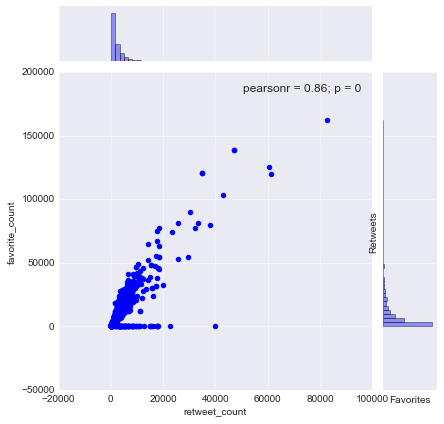

In [124]:
sea.jointplot(x='retweet_count',y='favorite_count',data=dataframe)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.savefig('COR_RF',dpi=80)
plt.show()

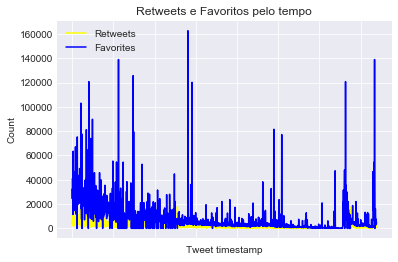

In [14]:
time = dataframe[['timestamp', 'retweet_count', 'favorite_count']].copy()
time.set_index('timestamp', inplace=True)
time['retweet_count'].plot(color = 'yellow', label='Retweets')
time['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets e Favoritos pelo tempo')
plt.savefig('RF_count_time',dpi=160)
plt.show()

#### Insight 4 
Quando olhamos o número de tweets e retweets podemos ver uma forte correlação, pelo coeficiente de pearson podemos ver que ele valor é de 0,86. Que indica uma relação forte, por 0,04 não temos uma relação muito forte. Mas o que isso quer dizer? Que quanto maior é o número de favoritos, maior será o número de retweets e vice e versa. Quando olhamos os tweets ao longo do tempom, vemos esporádicos picos na mesma data. Conforme podemos olhar na imagem, **quando a label do eixo x marca os meses de Janeiro e Julho**, temos geralmente picos de Retweets e Favoritos.  

In [110]:
dataplot = dataframe.groupby(dataframe['dog_breed']).agg('sum').sort_values(['favorite_count','retweet_count'],ascending=False).loc[:,['retweet_count','favorite_count']].head(11)
dataplot

,retweet_count,favorite_count
dog_breed,,
golden_retriever,529806,1544240
pembroke,304464,1078375
labrador_retriever,367940,1010984
chihuahua,232339,629138
french_bulldog,152652,598311
samoyed,206926,532378
chow,117723,390757
lakeland_terrier,119662,340099
pomeranian,114930,320196


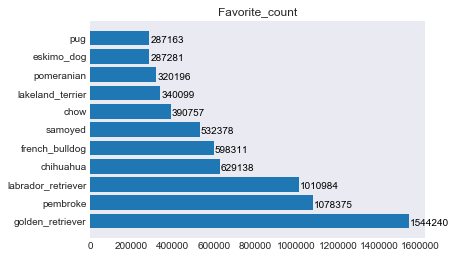

In [111]:
plt.style.use('seaborn-dark')
plt.barh(dataplot.index,dataplot['favorite_count'])
plt.title('Favorite_count')
for i,v in enumerate(dataplot.favorite_count):
    plt.text(v + 5000, i - .25, str(v), color='black')
plt.savefig('Favorite_count',dpi=80)    
plt.show()

In [15]:
dataplot=dataframe.groupby(dataframe['dog_breed']).agg('sum').sort_values(['retweet_count','favorite_count'],ascending=False).loc[:,['retweet_count','favorite_count']].head(11)
dataplot

,retweet_count,favorite_count
dog_breed,,
golden_retriever,529806.0,1544240.0
labrador_retriever,367940.0,1010984.0
pembroke,304464.0,1078375.0
chihuahua,232339.0,629138.0
samoyed,206926.0,532378.0
french_bulldog,152652.0,598311.0
lakeland_terrier,119662.0,340099.0
chow,117723.0,390757.0
pomeranian,114930.0,320196.0


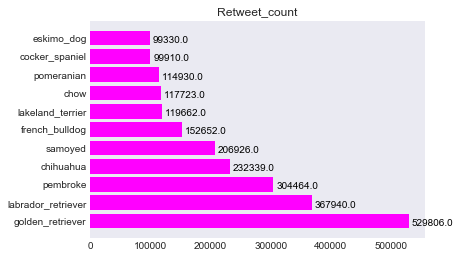

In [16]:
plt.style.use('seaborn-dark')
plt.barh(dataplot.index,dataplot['retweet_count'], align='center', color='magenta')
for i,v in enumerate(dataplot.retweet_count):
    plt.text(v + 5000, i - .25, str(v), color='black')
plt.title('Retweet_count')
plt.savefig('Retweet_count', dpi=160)
plt.show()



In [100]:
dataframe.dog_breed.value_counts().head(11)

golden_retriever      158
labrador_retriever    102
pembroke              97 
chihuahua             83 
pug                   62 
samoyed               45 
chow                  44 
pomeranian            44 
toy_poodle            43 
malamute              32 
cocker_spaniel        30 
Name: dog_breed, dtype: int64

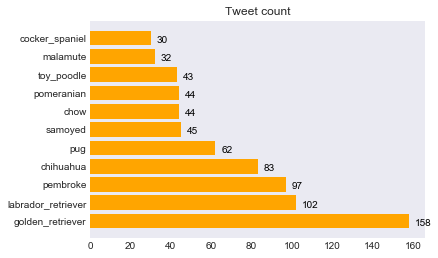

In [17]:
dataplot = dataframe.dog_breed.value_counts().head(11)
plt.style.use('seaborn-dark')
plt.barh(dataplot.index,dataplot.values, align='center', color='orange')
for i,v in enumerate(dataplot.values):
    plt.text(v + 3, i - .25, str(v), color='black')
plt.title('Tweet count')
plt.savefig('Tweet_count',dpi=80)
plt.show()



In [102]:
dataframe.loc[:,['retweet_count','favorite_count']].max()

retweet_count     82745 
favorite_count    162639
dtype: int64

In [103]:
dataframe.loc[dataframe['favorite_count']==162639]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,dog_breed,retweet_count,favorite_count,confidence_prediction,dog_stage
713,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,labrador_retriever,82745,162639,0.888456,doggo


#### Insight 5
Por último, mas não menos importante, vamos analisar os cachorros. Para uma melhor análise observaremos somente os 11 primeiros. Tanto na quantidade de Tweets, quanto na quantidade de retweets e favoritos. Vemos que as posições de popularidade quase não se alteram. Com algumas raras exceções, seguindo a lógica quanto maior o número de tweets, maior será o número e favoritos e retweets. **Labrador_retriever** é um dos mais publicados junto do **golden_retriever**, é dele também o recorde de maior número de de retweets e favoritos, porém quando observamos os favoritos ele ainda perde para o **pembroke** que tem 5 publicações a menos. **Pug** apesar do número de postagens não é um cachorro muito popular. 
